In [4]:
""" 와인 데이터 정리 """
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('../dataset/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']

# 클래스 1 제외
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 1, stratify = y)

In [5]:
""" 1차 결정 트리 적용 """
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth = 1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('결정 트리의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (tree_train, tree_test))

결정 트리의 훈련 정확도/테스트 정확도 0.916/0.875


In [6]:
""" 에이다부스트 모델 적용 """

ada = AdaBoostClassifier(base_estimator = tree,
                       n_estimators = 500, learning_rate = 0.1, random_state = 1)

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print('에이다부스트의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (ada_train, ada_test))

에이다부스트의 훈련 정확도/테스트 정확도 1.000/0.917


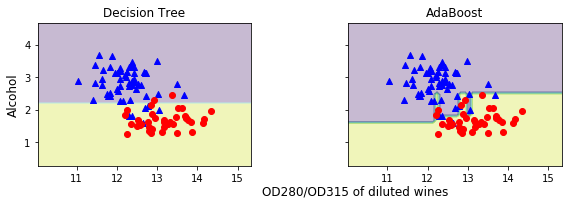

In [8]:
""" 결정 경계 확인 """
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                    np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 2,
                       sharex = 'col', sharey = 'row',
                       figsize = (8,3))

for idx, clf, tt in zip([0, 1], [tree, ada], ['Decision Tree', 'AdaBoost']) :
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha = 0.3)
    axarr[idx].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
                      c = 'blue', marker = '^')
    axarr[idx].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
                      c = 'red', marker = 'o')
    axarr[idx].set_title(tt)
    axarr[0].set_ylabel('Alcohol', fontsize = 12)

plt.text(10.2, -0.5,
        s = 'OD280/OD315 of diluted wines',
        ha = 'center', va = 'center', fontsize = 12)
plt.tight_layout()
plt.show()

In [10]:
""" 그래디언트 부스팅 """
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators = 20, random_state = 42)
gbrt.fit(X_train, y_train)
gbrt_train_score = gbrt.score(X_train, y_train)
gbrt_test_score = gbrt.score(X_test, y_test)

print('앙상블에 사용한 트리 개수 %d' % gbrt.n_estimators_)
print('그래디언트 부스팅의 훈련 정확도/테스트 정확도 %.3f/%.3f' % (gbrt_train_score, gbrt_test_score))

앙상블에 사용한 트리 개수 20
그래디언트 부스팅의 훈련 정확도/테스트 정확도 1.000/0.917
